# Pesquisa Satisfação InterConstrutora por EXPERT

#### 1) Importar as bibliotecas necessárias para este projeto

In [0]:
import numpy as np
import pandas as pd
#import pandas_profiling
#import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Formatação mais bonita para os notebooks
%matplotlib inline

#### 2) Importando base de dados

In [0]:
data = pd.read_excel('Pesquisa de satisfacao.xlsx')

#### 3) Importando os 5 primeiros dados

In [0]:
data.head()

,QUESTÃO,QUESTAO,QUESTAO_CATEGORIA,NOTA,PROPRIETARIO,EMPREENDIMENTO,TORRE,UNIDADE,PAVIMENTO,TEMPO,COMENTARIO
0,1,Atendimento comercial (corretor),atendimentoComercial,Excelente,Neusa Maria de Oliveira,UNIQUE BORBOLETA,I,103,1º PAVIMENTO,5 meses,Cliente diz que teve que reformar o imóvel int...
1,2,Funcionamento das janelas,janela,Bom,Neusa Maria de Oliveira,UNIQUE BORBOLETA,I,103,1º PAVIMENTO,5 meses,Cliente diz que teve que reformar o imóvel int...
2,3,Funcionamento das portas e ferragens,portaFerragem,Excelente,Neusa Maria de Oliveira,UNIQUE BORBOLETA,I,103,1º PAVIMENTO,5 meses,Cliente diz que teve que reformar o imóvel int...
3,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Regular,Neusa Maria de Oliveira,UNIQUE BORBOLETA,I,103,1º PAVIMENTO,5 meses,Cliente diz que teve que reformar o imóvel int...
4,5,Funcionamento das instalações elétricas,instalacaoEletrica,Bom,Neusa Maria de Oliveira,UNIQUE BORBOLETA,I,103,1º PAVIMENTO,5 meses,Cliente diz que teve que reformar o imóvel int...


#### 4) Visualizando informações dos dados

#### OBS: 
- A coluna "QUESTAO" refere-se as perguntas abordadas na pesquisa de satisfação.

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
QUESTÃO              1000 non-null int64
QUESTAO              1000 non-null object
QUESTAO_CATEGORIA    1000 non-null object
NOTA                 1000 non-null object
PROPRIETARIO         1000 non-null object
EMPREENDIMENTO       1000 non-null object
TORRE                1000 non-null object
UNIDADE              1000 non-null int64
PAVIMENTO            1000 non-null object
TEMPO                1000 non-null object
COMENTARIO           430 non-null object
dtypes: int64(2), object(9)
memory usage: 86.0+ KB


In [0]:
data.dtypes

QUESTÃO               int64
QUESTAO              object
QUESTAO_CATEGORIA    object
NOTA                 object
PROPRIETARIO         object
EMPREENDIMENTO       object
TORRE                object
UNIDADE               int64
PAVIMENTO            object
TEMPO                object
COMENTARIO           object
dtype: object

#### 5) 

In [0]:
# Informações estatísticas das colunas Dataframe
data.describe()

,QUESTÃO,UNIDADE
count,1000.000000,1000.000000
mean,5.500000,521.320000
std,2.873719,295.042145
min,1.000000,101.000000
25%,3.000000,278.250000
50%,5.500000,503.000000
75%,8.000000,801.250000
max,10.000000,1012.000000


#### *******6) Consultando se houve dados nulos ou perdidos (Missing Values) 

*   List item
*   List item

no Dataframe

In [0]:
data.isnull().sum()

QUESTÃO                0
QUESTAO                0
QUESTAO_CATEGORIA      0
NOTA                   0
PROPRIETARIO           0
EMPREENDIMENTO         0
TORRE                  0
UNIDADE                0
PAVIMENTO              0
TEMPO                  0
COMENTARIO           570
dtype: int64

- Plot visual da proporção dos dados faltantes
    * Cor **ROX** = dados preenchidos;
    * Cor **AMARELO** = Dados faltantes.

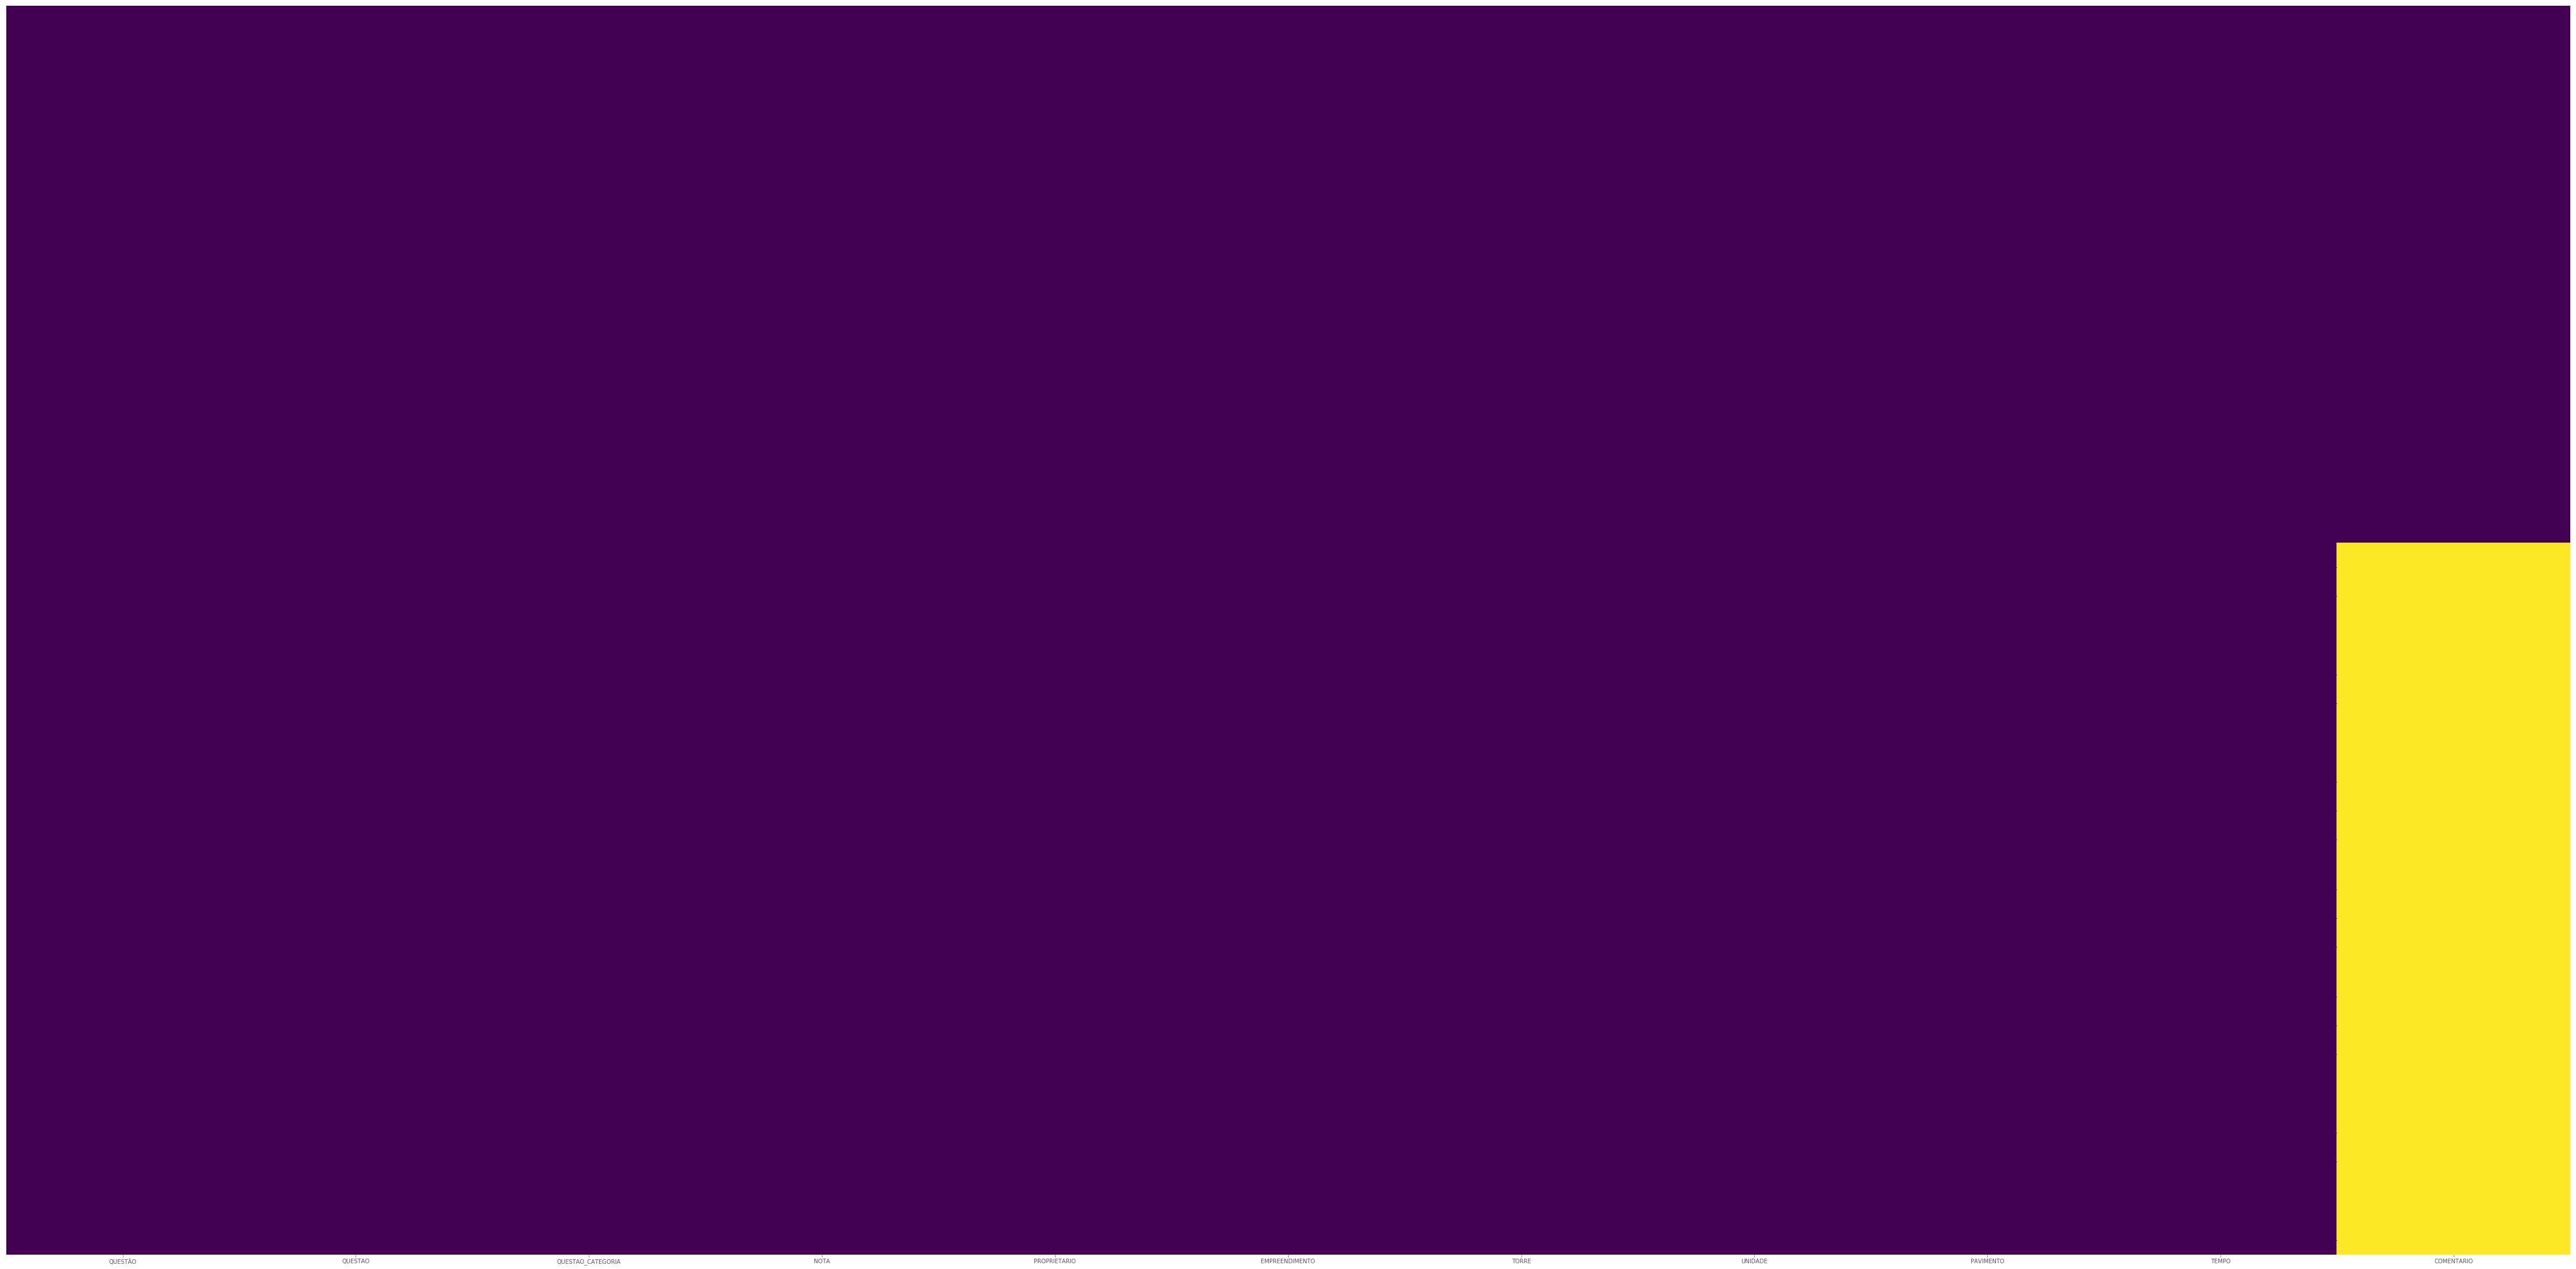

In [0]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(80,40))

sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

**Porcentagem de dados faltantes**

In [0]:
percent_missing = data.isnull().sum() * 100 / len(data) # Quantidade de dados faltantes de cada coluna * 100 / Total de dados de cada
missing_value_data = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

pd.set_option('display.max_rows', None)
missing_value_data

,column_name,percent_missing
QUESTÃO,QUESTÃO,0.0
QUESTAO,QUESTAO,0.0
QUESTAO_CATEGORIA,QUESTAO_CATEGORIA,0.0
NOTA,NOTA,0.0
PROPRIETARIO,PROPRIETARIO,0.0
EMPREENDIMENTO,EMPREENDIMENTO,0.0
TORRE,TORRE,0.0
UNIDADE,UNIDADE,0.0
PAVIMENTO,PAVIMENTO,0.0
TEMPO,TEMPO,0.0


#### 7) Formato do banco de dados (Nª linhas x Nª colunas)

In [0]:
data.shape

(1000, 11)

#### 8) Retorna valores únicos na base de dados

In [1]:
# Retorna valores únicos, ou seja, as questões na coluna QUESTAO
data.QUESTAO.unique()

NameError: ignored

In [0]:
# Retornar os valores unicos de NOTAS. Ou seja, notas aplicadas
data.NOTA.unique()

array(['Excelente', 'Bom', 'Regular', 'Ruim', 'Não Aplicável'],
      dtype=object)

In [0]:
# Nomes dos proprietários que deram as opiniões
data.PROPRIETARIO.unique()

array(['Neusa Maria de Oliveira', 'Douglas Rodrigues da Silva Pereira ',
       'Júlio César Miguel ', 'Tamiris Marciano Rodrigues ',
       'Charles Martinho da Silva ',
       'Guilherme Henrique Andrade de Oliveira ', 'Everton Pablo Braga ',
       'Bruno Pinto dos Reis ', 'Paulo Vitorino Quaresma Juinor ',
       'Karina Guimarães Martins ', 'Mayara Aparecida Fernandes ',
       'Tatiana Aparecida Pimenta Flores ',
       'Muryllo Mendes Bruno Ferrari ', 'Rafael Alves da Silva ',
       'Isabela Lopes e Nascimento ', 'Carlos Eduardo Salles Marques ',
       'Daniel Rodrigues Pereira Santos ', 'Juliana Soares Mendonça ',
       'Priscila Clarinda Silva Alves ', 'Raissa Marquioli Baião Milton ',
       'Arine Mendonça de Almeida ', 'Katiusca Aparecida Faria ',
       'Dyessica Mara Felizardo ', 'Victor Lameira Machado da Costa ',
       'Wanderleia Venerando Pereira Santiago ', 'Wesley Santos Eneas',
       'Jan Pierri Coelho Silva ', 'José Gabriel Brohme de Assis ',
       'Aline da

#### 9) Fazendo Querys no Dataframe

In [0]:
# Lista todas as opiniões "Excelentes" da base de dados
data.loc[(data['NOTA'] == 'Excelente')]

,QUESTÃO,QUESTAO,QUESTAO_CATEGORIA,NOTA,PROPRIETARIO,EMPREENDIMENTO,TORRE,UNIDADE,PAVIMENTO,TEMPO,COMENTARIO
0,1,Atendimento comercial (corretor),atendimentoComercial,Excelente,Neusa Maria de Oliveira,UNIQUE BORBOLETA,I,103,1º PAVIMENTO,5 meses,Cliente diz que teve que reformar o imóvel int...
2,3,Funcionamento das portas e ferragens,portaFerragem,Excelente,Neusa Maria de Oliveira,UNIQUE BORBOLETA,I,103,1º PAVIMENTO,5 meses,Cliente diz que teve que reformar o imóvel int...
6,7,Funcionamento da rede de gás,gas,Excelente,Neusa Maria de Oliveira,UNIQUE BORBOLETA,I,103,1º PAVIMENTO,5 meses,Cliente diz que teve que reformar o imóvel int...
8,9,Qualidade na execução da pintura,pintura,Excelente,Neusa Maria de Oliveira,UNIQUE BORBOLETA,I,103,1º PAVIMENTO,5 meses,Cliente diz que teve que reformar o imóvel int...
10,1,Atendimento comercial (corretor),atendimentoComercial,Excelente,Douglas Rodrigues da Silva Pereira,UNIQUE BORBOLETA,I,105,1º PAVIMENTO,3 meses,Cliente reclamou que volta água pelo cano da m...
11,2,Funcionamento das janelas,janela,Excelente,Douglas Rodrigues da Silva Pereira,UNIQUE BORBOLETA,I,105,1º PAVIMENTO,3 meses,Cliente reclamou que volta água pelo cano da m...
12,3,Funcionamento das portas e ferragens,portaFerragem,Excelente,Douglas Rodrigues da Silva Pereira,UNIQUE BORBOLETA,I,105,1º PAVIMENTO,3 meses,Cliente reclamou que volta água pelo cano da m...
16,7,Funcionamento da rede de gás,gas,Excelente,Douglas Rodrigues da Silva Pereira,UNIQUE BORBOLETA,I,105,1º PAVIMENTO,3 meses,Cliente reclamou que volta água pelo cano da m...
17,8,Funcionamento de louças e metais sanitários,loucaSanitario,Excelente,Douglas Rodrigues da Silva Pereira,UNIQUE BORBOLETA,I,105,1º PAVIMENTO,3 meses,Cliente reclamou que volta água pelo cano da m...
18,9,Qualidade na execução da pintura,pintura,Excelente,Douglas Rodrigues da Silva Pereira,UNIQUE BORBOLETA,I,105,1º PAVIMENTO,3 meses,Cliente reclamou que volta água pelo cano da m...


In [0]:
# Lista todas as opiniões "Ruim" da base de dados
data.loc[(data['NOTA'] == 'Ruim')]

,QUESTÃO,QUESTAO,QUESTAO_CATEGORIA,NOTA,PROPRIETARIO,EMPREENDIMENTO,TORRE,UNIDADE,PAVIMENTO,TEMPO,COMENTARIO
9,10,Qualidade e funcionamento dos elevadores,elevador,Ruim,Neusa Maria de Oliveira,UNIQUE BORBOLETA,I,103,1º PAVIMENTO,5 meses,Cliente diz que teve que reformar o imóvel int...
19,10,Qualidade e funcionamento dos elevadores,elevador,Ruim,Douglas Rodrigues da Silva Pereira,UNIQUE BORBOLETA,I,105,1º PAVIMENTO,3 meses,Cliente reclamou que volta água pelo cano da m...
39,10,Qualidade e funcionamento dos elevadores,elevador,Ruim,Tamiris Marciano Rodrigues,UNIQUE BORBOLETA,I,108,1º PAVIMENTO,Imóvel alugado,Cliente reclamou que volta água pelo cano da m...
48,9,Qualidade na execução da pintura,pintura,Ruim,Charles Martinho da Silva,UNIQUE BORBOLETA,I,201,2º PAVIMENTO,7 meses,Cliente diz que o atendimento demora para ser ...
49,10,Qualidade e funcionamento dos elevadores,elevador,Ruim,Charles Martinho da Silva,UNIQUE BORBOLETA,I,201,2º PAVIMENTO,7 meses,Cliente diz que o atendimento demora para ser ...
51,2,Funcionamento das janelas,janela,Ruim,Guilherme Henrique Andrade de Oliveira,UNIQUE BORBOLETA,I,205,2º PAVIMENTO,Não mora no imóvel ainda,Cliente fez muitos elogios ao corretor Moisés ...
55,6,Funcionamento das instalações hidráulicas,instalacaoHidraulica,Ruim,Guilherme Henrique Andrade de Oliveira,UNIQUE BORBOLETA,I,205,2º PAVIMENTO,Não mora no imóvel ainda,Cliente fez muitos elogios ao corretor Moisés ...
89,10,Qualidade e funcionamento dos elevadores,elevador,Ruim,Paulo Vitorino Quaresma Juinor,UNIQUE BORBOLETA,I,304,3º PAVIMENTO,8 meses,"Cliente reclamou bastante dos elevadores, das ..."
91,2,Funcionamento das janelas,janela,Ruim,Karina Guimarães Martins,UNIQUE BORBOLETA,I,306,3º PAVIMENTO,1 ano,Cliente diz que volta água pelo cano da máquin...
93,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Ruim,Karina Guimarães Martins,UNIQUE BORBOLETA,I,306,3º PAVIMENTO,1 ano,Cliente diz que volta água pelo cano da máquin...


In [0]:
# Lista quantidades de opiniões "Excelentes"
data.loc[(data['NOTA'] == 'Excelente')].count()

QUESTÃO              255
QUESTAO              255
QUESTAO_CATEGORIA    255
NOTA                 255
PROPRIETARIO         255
EMPREENDIMENTO       255
TORRE                255
UNIDADE              255
PAVIMENTO            255
TEMPO                255
COMENTARIO           125
dtype: int64

In [0]:
data.loc[(data['NOTA'] == 'Ruim')].count()

QUESTÃO              130
QUESTAO              130
QUESTAO_CATEGORIA    130
NOTA                 130
PROPRIETARIO         130
EMPREENDIMENTO       130
TORRE                130
UNIDADE              130
PAVIMENTO            130
TEMPO                130
COMENTARIO            88
dtype: int64

In [0]:
# Ordena Dataframe pela coluna de NOTA por ordem crescente ??
data.sort_values(by='NOTA', ascending=True)

,QUESTÃO,QUESTAO,QUESTAO_CATEGORIA,NOTA,PROPRIETARIO,EMPREENDIMENTO,TORRE,UNIDADE,PAVIMENTO,TEMPO,COMENTARIO
814,5,Funcionamento das instalações elétricas,instalacaoEletrica,Bom,Leticia Doriguetto Coutinho,UNIQUE UBÁ,I,206,2º PAVIMENTO,8 meses,NaN
793,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Bom,Maria Lucia Micheli,UNIQUE UBÁ,I,210,2º PAVIMENTO,Não reside,NaN
431,2,Funcionamento das janelas,janela,Bom,Dieysson de Oliveira Damião,RESIDENCIAL SÃO GERALDO DA INTER II,I,101,1º PAVIMENTO,1 ano,NaN
432,3,Funcionamento das portas e ferragens,portaFerragem,Bom,Dieysson de Oliveira Damião,RESIDENCIAL SÃO GERALDO DA INTER II,I,101,1º PAVIMENTO,1 ano,NaN
433,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Bom,Dieysson de Oliveira Damião,RESIDENCIAL SÃO GERALDO DA INTER II,I,101,1º PAVIMENTO,1 ano,NaN
792,3,Funcionamento das portas e ferragens,portaFerragem,Bom,Maria Lucia Micheli,UNIQUE UBÁ,I,210,2º PAVIMENTO,Não reside,NaN
438,9,Qualidade na execução da pintura,pintura,Bom,Dieysson de Oliveira Damião,RESIDENCIAL SÃO GERALDO DA INTER II,I,101,1º PAVIMENTO,1 ano,NaN
794,5,Funcionamento das instalações elétricas,instalacaoEletrica,Bom,Maria Lucia Micheli,UNIQUE UBÁ,I,210,2º PAVIMENTO,Não reside,NaN
791,2,Funcionamento das janelas,janela,Bom,Maria Lucia Micheli,UNIQUE UBÁ,I,210,2º PAVIMENTO,Não reside,NaN
444,5,Funcionamento das instalações elétricas,instalacaoEletrica,Bom,NEIDA DOS REIS,RESIDENCIAL SÃO GERALDO DA INTER II,I,104,1º PAVIMENTO,1 ano,NaN


In [0]:
# Lista notas "Excelentes" na categoria 'pisoAzulejo'
data.loc[(data['NOTA']=='Excelente') & (data['QUESTAO_CATEGORIA']=='pisoAzulejo')]

,QUESTÃO,QUESTAO,QUESTAO_CATEGORIA,NOTA,PROPRIETARIO,EMPREENDIMENTO,TORRE,UNIDADE,PAVIMENTO,TEMPO,COMENTARIO
33,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Excelente,Tamiris Marciano Rodrigues,UNIQUE BORBOLETA,I,108,1º PAVIMENTO,Imóvel alugado,Cliente reclamou que volta água pelo cano da m...
43,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Excelente,Charles Martinho da Silva,UNIQUE BORBOLETA,I,201,2º PAVIMENTO,7 meses,Cliente diz que o atendimento demora para ser ...
53,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Excelente,Guilherme Henrique Andrade de Oliveira,UNIQUE BORBOLETA,I,205,2º PAVIMENTO,Não mora no imóvel ainda,Cliente fez muitos elogios ao corretor Moisés ...
83,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Excelente,Paulo Vitorino Quaresma Juinor,UNIQUE BORBOLETA,I,304,3º PAVIMENTO,8 meses,"Cliente reclamou bastante dos elevadores, das ..."
123,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Excelente,Muryllo Mendes Bruno Ferrari,UNIQUE BORBOLETA,I,401,4º PAVIMENTO,Imóvel alugado,Cliente reclamou na demora para instalar as lu...
213,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Excelente,Katiusca Aparecida Faria,UNIQUE BORBOLETA,I,607,6º PAVIMENTO,10 meses,Cliente diz que os elevadores são péssimos e q...
233,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Excelente,Victor Lameira Machado da Costa,UNIQUE BORBOLETA,I,707,7º PAVIMENTO,9 meses,Cliente diz que as janelas são difíceis de lim...
423,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Excelente,Weverson Martins Rodrigues,UNIQUE BORBOLETA,II,504,5º PAVIMENTO,1 ano,Cliente reclama que as janelas e portas estão ...
493,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Excelente,MAURILIO MACHADO DE OLIVEIRA JUNIOR,RESIDENCIAL SÃO GERALDO DA INTER II,I,403,4º PAVIMENTO,6 meses,NaN
543,4,Qualidade no assentamento de pisos e azulejos,pisoAzulejo,Excelente,RENATO DA SILVA COELHO,UNIQUE UBÁ,I,912,9º PAVIMENTO,Não reside,NaN


In [0]:
# Lista de NOTAS = Ruins para o atendimentoComercial .
data.loc[(data['NOTA']=='Ruim') & (data['QUESTAO_CATEGORIA']=='atendimentoComercial')]

,QUESTÃO,QUESTAO,QUESTAO_CATEGORIA,NOTA,PROPRIETARIO,EMPREENDIMENTO,TORRE,UNIDADE,PAVIMENTO,TEMPO,COMENTARIO
250,1,Atendimento comercial (corretor),atendimentoComercial,Ruim,Wesley Santos Eneas,UNIQUE BORBOLETA,I,806,8º PAVIMENTO,6 meses,Cliente dia que o primeiro corretor que lhe at...
280,1,Atendimento comercial (corretor),atendimentoComercial,Ruim,Aline da Cunha Rineiro,UNIQUE BORBOLETA,I,1002,10º PAVIMENTO,9 meses,Não comentou.
810,1,Atendimento comercial (corretor),atendimentoComercial,Ruim,Leticia Doriguetto Coutinho,UNIQUE UBÁ,I,206,2º PAVIMENTO,8 meses,NaN
870,1,Atendimento comercial (corretor),atendimentoComercial,Ruim,Isabela Francisca da Costa,UNIQUE UBÁ,I,103,1º PAVIMENTO,Não reside,NaN


#### 10) Visualização de Dados

In [0]:
# Visualização das Notas em quantidades e gráficos
#data['NOTA'].pd.to_datetime(df['NOTA'])
#data.groupby('NOTA')['QUESTAO'].nunique().plot(kind='bar')
#plt.show()
data.groupby(['EMPREENDIMENTO','QUESTAO','NOTA']).size()

EMPREENDIMENTO                       QUESTAO                                        NOTA         
RESIDENCIAL SÃO GERALDO DA INTER II  Atendimento comercial (corretor)               Bom               2
                                                                                    Excelente         6
                                     Funcionamento da rede de gás                   Não Aplicável     8
                                     Funcionamento das instalações elétricas        Bom               6
                                                                                    Excelente         2
                                     Funcionamento das instalações hidráulicas      Bom               6
                                                                                    Excelente         2
                                     Funcionamento das janelas                      Bom               5
                                                                      

In [0]:
# OU utilizando o Crosstab para representações em tabelas e gráficos
pd.crosstab(data['QUESTAO'],data['NOTA'], margins=True)

NOTA,Bom,Excelente,Não Aplicável,Regular,Ruim,All
QUESTAO,,,,,,
Atendimento comercial (corretor),35,56,3,2,4,100
Funcionamento da rede de gás,47,37,11,4,1,100
Funcionamento das instalações elétricas,47,23,3,13,14,100
Funcionamento das instalações hidráulicas,52,22,2,11,13,100
Funcionamento das janelas,56,20,1,15,8,100
Funcionamento das portas e ferragens,55,28,0,9,8,100
Funcionamento de louças e metais sanitários,59,26,1,7,7,100
Qualidade e funcionamento dos elevadores,17,7,9,22,45,100
Qualidade na execução da pintura,48,21,4,17,10,100


<IPython.core.display.Javascript object>


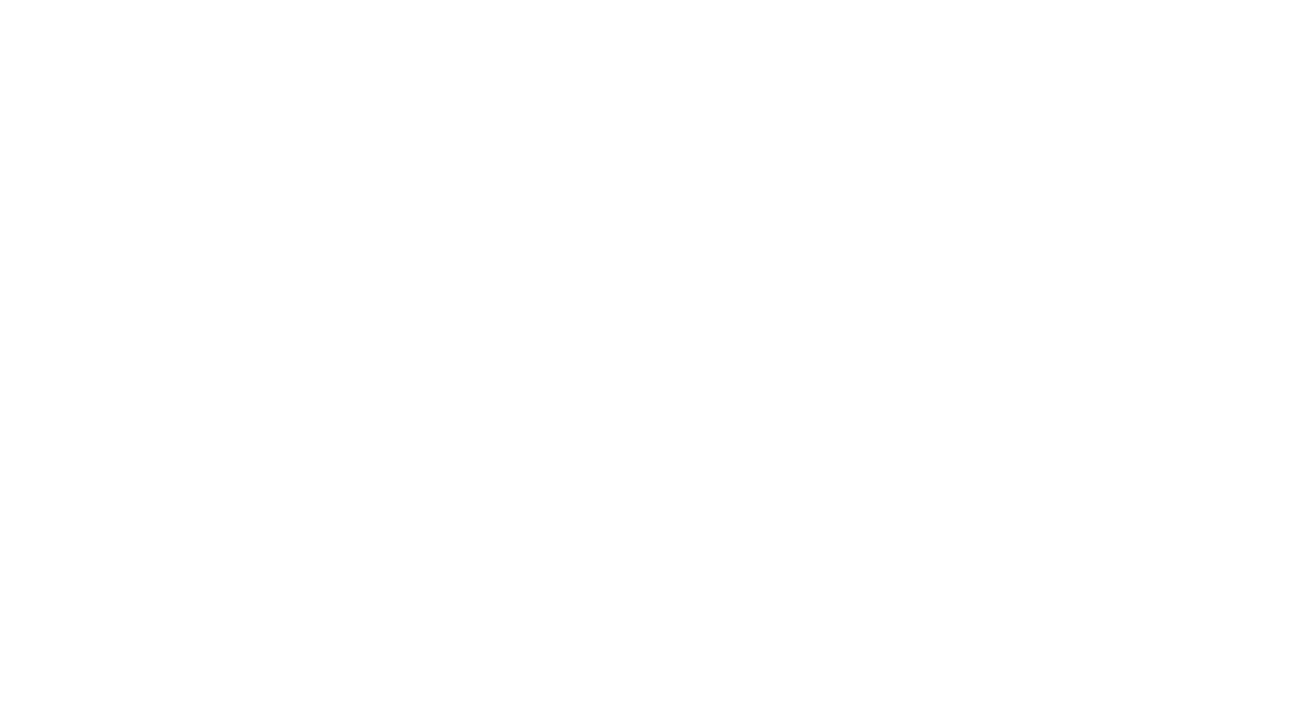

<IPython.core.display.Javascript object>


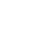

NOTA,Bom,Excelente,Não Aplicável,Regular,Ruim,All
QUESTAO,,,,,,
Atendimento comercial (corretor),35,56,3,2,4,100
Funcionamento da rede de gás,47,37,11,4,1,100
Funcionamento das instalações elétricas,47,23,3,13,14,100
Funcionamento das instalações hidráulicas,52,22,2,11,13,100
Funcionamento das janelas,56,20,1,15,8,100
Funcionamento das portas e ferragens,55,28,0,9,8,100
Funcionamento de louças e metais sanitários,59,26,1,7,7,100
Qualidade e funcionamento dos elevadores,17,7,9,22,45,100
Qualidade na execução da pintura,48,21,4,17,10,100


<IPython.core.display.Javascript object>


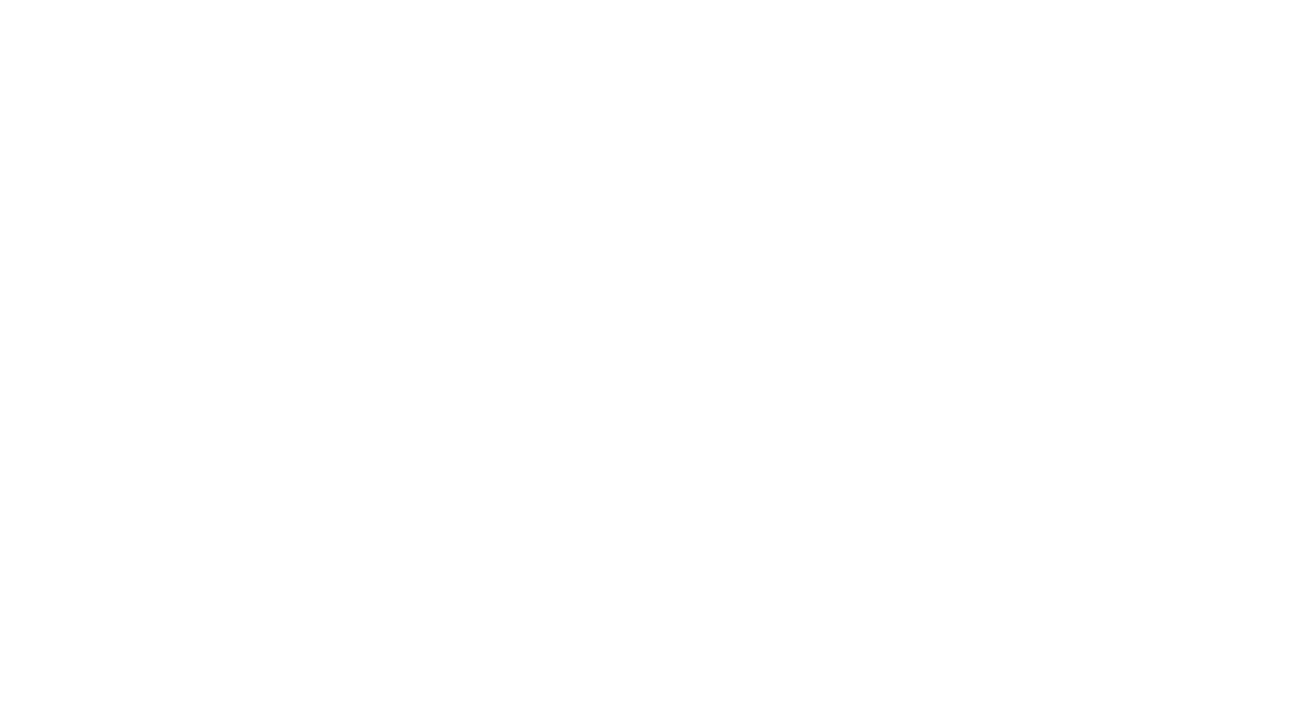

<IPython.core.display.Javascript object>


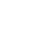

In [0]:
table = pd.crosstab(data['QUESTAO'],data['NOTA'])
plt.figure(figsize=(18,10))
table.plot(kind='bar',width=1.0, 
           color=['red','blue','orange','green', 'purple'], 
           title='Questão X Nota' ,
           grid=True,
           figsize=(0.5,0.5))
           

pd.crosstab(data['QUESTAO'],data['NOTA'], margins=True)

#### *******10.1) Encontrar proporção entre EMPREENDIMENTO x NOTA:

<IPython.core.display.Javascript object>


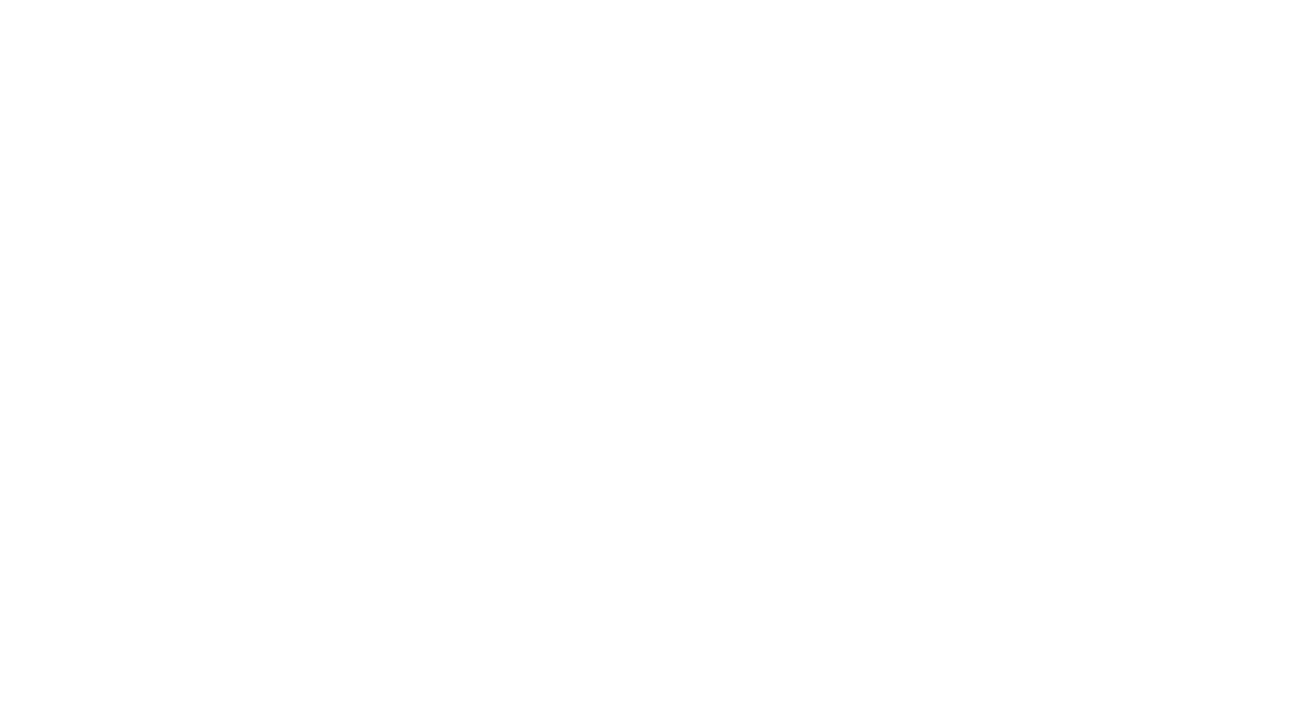

<IPython.core.display.Javascript object>


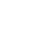

NOTA,Bom,Excelente,Não Aplicável,Regular,Ruim,All
EMPREENDIMENTO,,,,,,
RESIDENCIAL SÃO GERALDO DA INTER II,42,18,16,4,0,80
UNIQUE BORBOLETA,150,125,18,49,88,430
UNIQUE UBÁ,272,112,0,64,42,490
All,464,255,34,117,130,1000


<IPython.core.display.Javascript object>


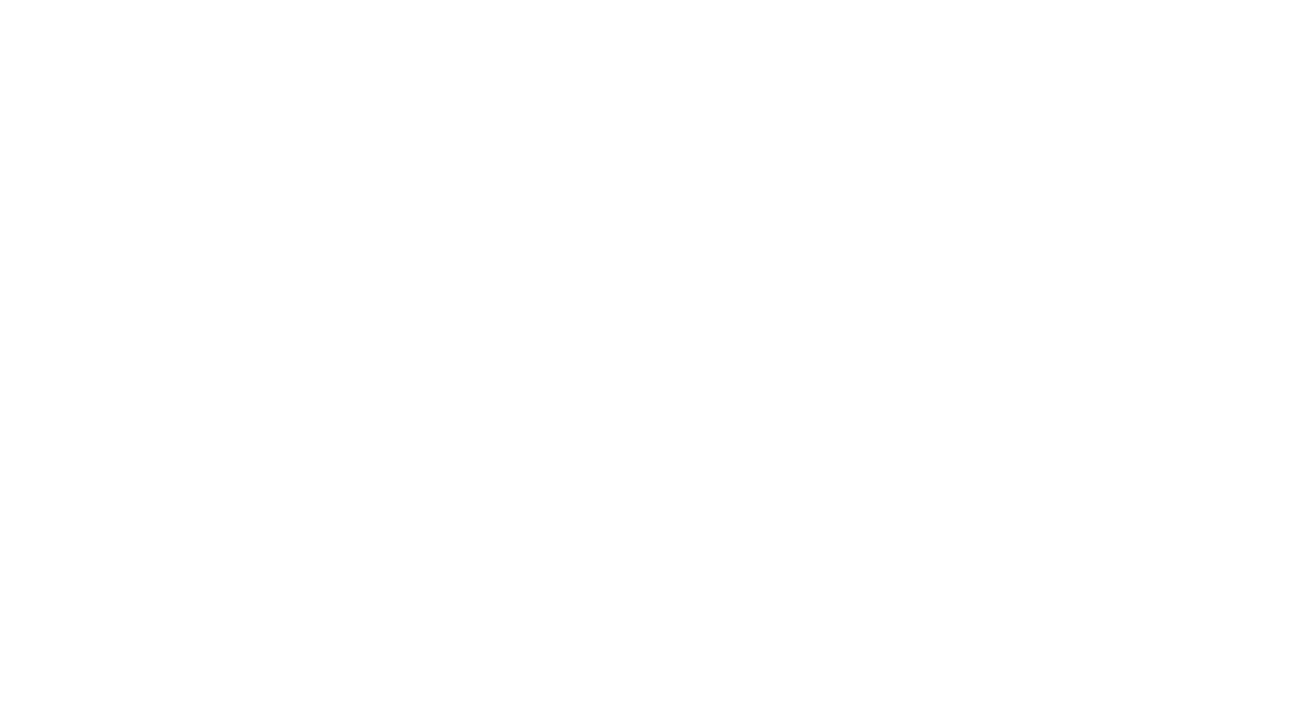

<IPython.core.display.Javascript object>


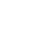

In [0]:
table = pd.crosstab(data['EMPREENDIMENTO'],data['NOTA'])
plt.figure(figsize=(18,10))
table.plot(kind='bar',width=1.0, 
           color=['red','blue','orange','green', 'purple'], 
           title='Empreendimento X Nota' ,
           grid=True,
           figsize=(0.5,0.5))
           

pd.crosstab(data['EMPREENDIMENTO'],data['NOTA'], margins=True)